In [68]:
import pandas as pd
import os
import bokeh.charts as bk
import seaborn as sns
from IPython.display import Image
import numpy as np
import plotly.graph_objs as plt
import plotly.plotly as plty
%matplotlib inline

In [4]:
hdrv = pd.read_csv ('riverkeeper_data_2013.csv')

In [5]:
hdrv.head(n=6)

,Site,Date,EnteroCount,FourDayRainTotal,SampleCount
0,Hudson above Mohawk River,10/16/2011,1733,1.5,35
1,Hudson above Mohawk River,10/21/2013,4,0.2,35
2,Hudson above Mohawk River,9/21/2013,20,0.0,35
3,Hudson above Mohawk River,8/19/2013,6,0.0,35
4,Hudson above Mohawk River,7/21/2013,31,0.0,35
5,Hudson above Mohawk River,6/4/2013,238,1.2,35


In [6]:
hdrv.describe()

,FourDayRainTotal,SampleCount
count,3397.000000,3397.000000
mean,0.568001,56.886370
std,1.000387,41.588476
min,0.000000,27.000000
25%,0.000000,37.000000
50%,0.200000,42.000000
75%,0.700000,50.000000
max,8.500000,187.000000


In [7]:
hdrv['Date'] = pd.Series([pd.to_datetime(d) for d in hdrv['Date']])

In [30]:
## FIND VALUES THAT ARE NOT NUMERIC

sample = hdrv['EnteroCount'].loc[hdrv['EnteroCount'].str.isnumeric()==False]
sample.unique()

array(['>2420', '<1', '<10', '>24196'], dtype=object)

In [31]:
# Remove string from numeric value
hdrv['EnteroCount'] = hdrv['EnteroCount'].str.replace("<", "")
hdrv['EnteroCount'] = hdrv['EnteroCount'].str.replace(">", "")

In [32]:
#Check to see if all are numeric value
sample = hdrv['EnteroCount'].loc[hdrv['EnteroCount'].str.isnumeric()==False]
sample.unique()

array([], dtype=object)

In [34]:
hdrv['EnteroCount'] = hdrv ['EnteroCount'].convert_objects(convert_numeric= True)
hdrv.describe()

C:\Python27\lib\site-packages\ipykernel\__main__.py:1: FutureWarning:

convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.



,EnteroCount,FourDayRainTotal,SampleCount
count,3397.000000,3397.000000,3397.000000
mean,387.747719,0.568001,56.886370
std,2046.114024,1.000387,41.588476
min,0.000000,0.000000,27.000000
25%,10.000000,0.000000,37.000000
50%,18.000000,0.200000,42.000000
75%,85.000000,0.700000,50.000000
max,24196.000000,8.500000,187.000000


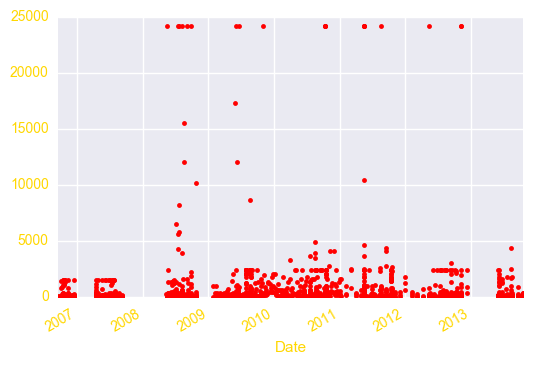

In [43]:
## Lets Make some GRAPHS!!!
ts = hdrv ['EnteroCount']
ts.index= hdrv['Date']
graph1 = ts.plot(kind ='line', style = [' .r'])
graph1.xaxis.label.set_color('gold')
graph1.tick_params(colors = 'gold')

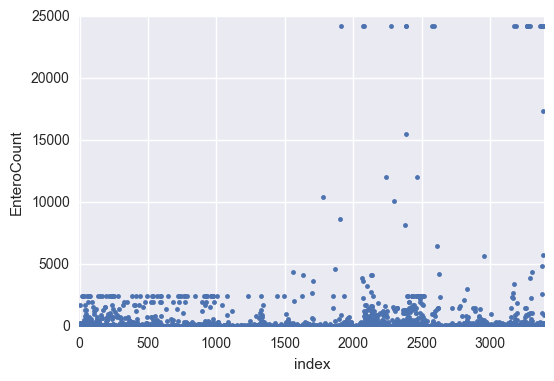

In [45]:
# Graphing using 'seaborn'
# docs at http://web.stanford.edu/~mwaskom/software/seaborn/tutorial/timeseries_plots.html
hdrv['unit'] = 'Entero Count'
sns.tsplot(hdrv.reset_index(),
           time='index',
           unit='unit',
           value='EnteroCount',
           err_style=None,
           interpolate=False,
           marker = '.'
           )

In [62]:
#bokeh: graphing using

bokeh_chart = bk.TimeSeries(data= hdrv,
                            x= 'Date',
                            y= 'EnteroCount',
                            builder_type ='point',
                            title = 'Bokeh Chart of Entero Levels')
bk.show(bokeh_chart)

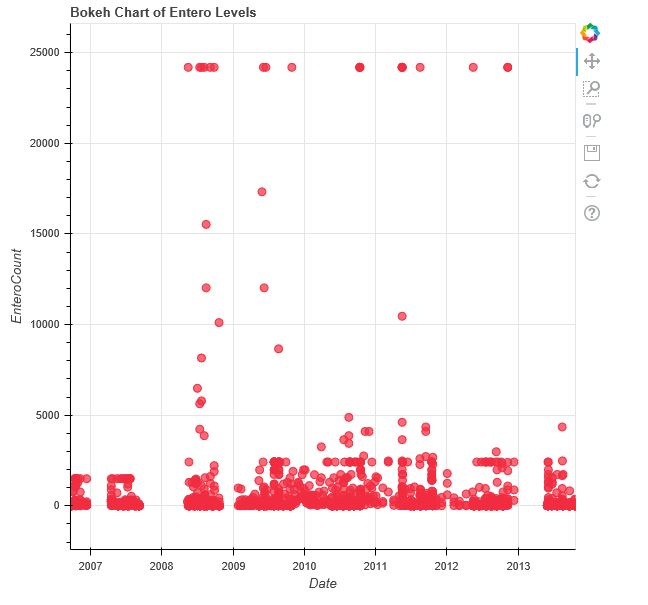

In [182]:
Image(filename='BokenChart.jpg')

In [63]:
#plotly chart without account

# plotlyData = [plt.Scatter (x = hdrv['Date'],
#                            y = hdrv['EnteroCount'],
#                            mode = 'markers')]
# plty.iplot(plotlyData)

In [132]:
hdrv2 = hdrv

In [131]:
##Create lists & graphs of the best and worst places to swim in the dataset.

In [134]:
hdrv3 =pd.DataFrame (hdrv2.groupby(['Site'])['EnteroCount'].mean())

hdrv3 = hdrv3.reset_index()
hdrv3.head(7)

,Site,EnteroCount
0,125th St. Pier,179.696970
1,79th St. mid-channel,47.204082
2,Albany Rowing Dock,280.944444
3,Annesville Creek,83.421053
4,Athens,201.314286
5,Beacon Harbor,52.657895
6,Bethlehem Launch Ramp,231.694444


In [135]:
hdrv3 = hdrv3.sort_values(by= 'EnteroCount', ascending= 0)
hdrv3 = hdrv3.reset_index()

In [143]:
from bokeh.charts.attributes import CatAttr, ColorAttr

tooltips = [('EnteroCount', '@EnteroCount')]
p = bk.Bar (data=hdrv3,xgrid='Site', values = 'EnteroCount',agg = 'mean', label = CatAttr(columns ='Site',sort=False), 
            legend = False, plot_width = 1100,
            plot_height = 700, tooltips = tooltips )
##, agg = 'mean')
#bk.output_file('bar1.html')
##p.rect(order,[val/2.0 for val in hdrv3['EnteroCount']], height = 'EnteroCount')

bk.show(p)

In [181]:
##Image(filename='WorstSite.jpg')

The testing of water quality can be sporadic. Which sites have been tested most regularly?
Which ones have long gaps between tests? Pick out 5-10 sites and visually compare how
regularly their water quality is tested.

In [166]:
hdrv4 =pd.DataFrame (hdrv2.groupby(['Site'])['EnteroCount'].count())
hdrv4 = hdrv4.reset_index()
hdrv4.columns =['Site', 'MeasureCount']
hdrv4 = hdrv4.sort_values(by='MeasureCount', ascending= 0)
hdrv4.head(9)

,Site,MeasureCount
57,Piermont Pier,187
70,Upper Sparkill Creek,165
0,125th St. Pier,66
52,Nyack Launch Ramp,61
47,Newtown Creek- Dutch Kills,57
65,TZ Bridge mid-channel,57
53,Orangetown STP Outfall,57
48,Newtown Creek- Metropolitan Ave. Bridge,57
74,Yonkers mid-channel,52


In [171]:
hdrv5 =hdrv.loc[ (hdrv['Site']=='Athens')|
          (hdrv['Site']=='Albany Rowing Dock')|
          (hdrv['Site']=='Nyack Launch Ramp')|
          (hdrv['Site']=='Tarrytown Marina')|
          (hdrv['Site']=='Castleton')]

In [174]:
hdrv6 =pd.DataFrame (hdrv5.groupby(['Site'])['EnteroCount'].count())
hdrv6 = hdrv6.reset_index()
hdrv6

,Site,EnteroCount
0,Albany Rowing Dock,36
1,Athens,35
2,Castleton,35
3,Nyack Launch Ramp,61
4,Tarrytown Marina,27


In [222]:
test = hdrv5[['Site', 'Date']]

test = test.sort_values(['Site', 'Date'], ascending = [True, True])
test = test.reset_index()
test['diffs'] =test['Date'].diff()
mask = test['Site'] != test['Site'].shift(1)
test['diffs'][mask] = np.nan
test.iloc[69:75]

C:\Python27\lib\site-packages\ipykernel\__main__.py:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



,index,Site,Date,diffs
69,436,Athens,2013-09-21,33 days
70,437,Athens,2013-10-21,30 days
71,322,Castleton,2008-06-19,NaT
72,321,Castleton,2008-07-17,28 days
73,323,Castleton,2008-08-09,23 days
74,293,Castleton,2008-09-17,39 days


In [268]:
test = test.dropna(axis = 0)
test['diffint'] = (test['diffs']/np.timedelta64(1,'D')).astype(int)

test1 = pd.DataFrame (test.groupby (['Site'])['diffint'].mean())
test2 = pd.DataFrame (test.groupby (['Site'])['diffint'].max())

In [274]:
frames = [test1,test2]
combine = pd.concat(frames, axis= 1 )
combine = combine.reset_index()
combine.columns = ['Site','AvgDays','MaxLaspe']
combine

,Site,AvgDays,MaxLaspe
0,Albany Rowing Dock,56.514286,232
1,Athens,57.382353,232
2,Castleton,57.352941,232
3,Nyack Launch Ramp,32.483333,248
4,Tarrytown Marina,73.000000,334


In [308]:
from bokeh.models.glyphs import Line as Line_glyph

combine = combine.sort_values(['AvgDays','MaxLaspe'],ascending = [False, True])

p2 = bk.Bar (data= combine ,xgrid='Site', values = 'MaxLaspe', label = CatAttr(columns ='Site',sort=False), 
            legend = False, plot_width = 800,
            plot_height = 600)


# glyph = Line_glyph (data = combine, x = 'Site', y = 'AvgDays', line_color = 'grey')
# 
# p2.add_glyph(glyph)

bk.show(p2)

ERROR:C:\Python27\lib\site-packages\bokeh\core\validation\check.pyc:E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name: AvgDays, Site [renderer: GlyphRenderer(id='04d5d762-ffdc-4386-8555-96b81a586050', ...)]


Is there a relationship between the amount of rain and water quality? Show this
relationship graphically. If you can, estimate the effect of rain on quality at different sites and
create a visualization to compare them.

In [286]:
quality = hdrv[['Site', 'FourDayRainTotal','EnteroCount']]
quality1 = pd.DataFrame(quality.groupby(['Site']).mean())
quality1 = quality1.reset_index()
quality1.head()

,Site,FourDayRainTotal,EnteroCount
0,125th St. Pier,0.771212,179.696970
1,79th St. mid-channel,0.861224,47.204082
2,Albany Rowing Dock,0.630556,280.944444
3,Annesville Creek,0.484211,83.421053
4,Athens,0.597143,201.314286


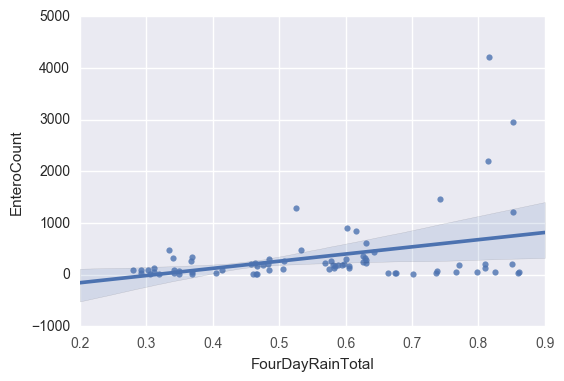

In [307]:
import matplotlib.pyplot as pplt
#import statsmodels.formula.api
#m,b = np.polyfit(quality1['FourDayRainTotal'],quality1['EnteroCount'],1)
#fit_fn = np.ploy1d(fit)
quality1.head()
sns.set_style("darkgrid",{"xtick.color": ".3"})
sns.regplot(x = 'FourDayRainTotal', y = 'EnteroCount', data= quality1 )